In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Homework week 7

In this week's homework we study the probability of an avalanche in neural activity.

We talk about avalanche when we have a sequence of bins in which at least one neuron is spiking. We denote with $P_>(t|λ_1, λ_2, \dots , λ_n)$ the probability of having an avalanche of duration longer than $t = n \cdot dt$, given the sequence of firing rates $λ_i \equiv r(t_i)$.

<br/>

We consider a population of $N$ neurons, and $dt = \dfrac{\alpha}{N}$ so that $n = \dfrac{Nt}{\alpha}$. The probability that at least ome neuron spikes in $\left [  t_j, t_j + dt \right ]$ is given by:<br>

$$
\begin{equation}
1 - \left (  1 - r_j dt  \right )^{N}
\end{equation}
$$
<br/>

Thus:

$$
\mathbb{P_>} \left (   t_n | r_1, \dots, r_n  \right ) = \left [   1 - (1 - r_ndt)^N  \right ]\mathbb{P}(t)\left (   t_{n-1} | r_1, \dots, r_n  \right )
$$

$\mathbb{P_>}$  can be computed recursively,

$$
\mathbb{P_>}(t|\vec{r}) = \prod_{i = 1}^n \left [  1 - \left (  1 - r_n dt  \right )^N  \right ]
$$

If we assume that $r_i$  are not correlated, we can them sample from a distribution $r_i \sim Q(r) = \gamma e^{-\gamma r}$, after marginalizing and taking into consideration the case $r_i = r$ for all $t$ and all neurons leads to the integral:

$$
\mathbb{P_>(t)} = \gamma \int_0^{\infty}dr e^{-\gamma r} \left (  1 - e^{-\alpha r}  \right )^n
$$

In the following we will solve the above integral using the saddle point approximation that in the $1$  dimensional case reads. <br>

$$
I(n) = \int_C g(x)e^{nf(x)}dx \approx \dfrac{\sqrt{2 \pi} g(x_c) e^{nf(x_c)}}{\left |  n f^{''}(x_c)  \right |^{\frac{1}{2}}}
$$

in the limit $n \to \infty$, where $x_c$ is the maximum of $f(x)$ within the interval $C$. This fromula holds if the maximum $x_c$ stays far from the boundary of $C$

In order to use te above formula we rewrite our formula as,

$$
I(n) \quad = \quad \gamma \int dr e^{n \left (  - \gamma \frac{r}{n} + ln \left ( 1 - e^{-\alpha r}  \right )\right )}
$$

So the function we need to find the minimum of, is $f(r) = - \gamma \dfrac{r}{n} + ln \left ( 1 - e^{-\alpha r} \right )$.

Taking the derivative we obtain,

$$
\dfrac{\gamma}{n} \quad = \quad \dfrac{\alpha}{e^{\alpha r} - 1}; \\
$$
$$
e^{\alpha r} - 1 \quad = \quad \dfrac{\alpha n}{\gamma};
$$
$$
e^{\alpha r} \quad = \quad 1 + \dfrac{\alpha n}{\gamma};
$$
$$
r \quad = \quad \dfrac{1}{\alpha} \cdot ln \left (  1 + \dfrac{\alpha n}{\gamma} \right )
$$

So we can now compute the term $e^{nf(r_c)}$

$$
e^{nf(r_c)} \quad = \quad exp \left \{-\dfrac{\gamma}{\alpha} \cdot ln \left ( 1 + \dfrac{\alpha n}{\gamma} \right )  \quad + \quad n\cdot ln \left ( 1 - \dfrac{1}{1 + \frac{\alpha n}{\gamma}} \right ) \right  \} \quad \approx
$$
$$
\quad \approx \left (  1 + \dfrac{\alpha n}{\gamma}  \right )^{-\dfrac{\gamma}{\alpha}} \cdot exp \left \{  n \cdot    \left (  - \dfrac{\gamma}{\gamma + \alpha n} \right ) \right\} \quad \approx
$$
$$
\quad \approx \left (  1 + \dfrac{\alpha n}{\gamma}  \right )^{-\dfrac{\gamma}{\alpha}} \cdot e^{-\frac{\gamma}{\alpha}}
$$

Where we used the $\approx$ sign to point out the fact that we have taken the limit $n \to \infty$, substituting back the relation $n = \dfrac{Nt}{\alpha}$ we get,

$$
\left (  1 + \dfrac{\cancel{\alpha} \dfrac{Nt}{\cancel{\alpha}}}{\gamma}  \right )^{-\dfrac{\gamma}{\alpha}} \cdot e^{-\frac{\gamma}{\alpha}}
$$

From which we notice a power law behaviour in $t$

We now have to compute the denominator term $\left |n f^{''}(x_c) \right |^{\frac{1}{2}}$

The second derivative yells,

$$
\dfrac{-\alpha^2 e^{-\alpha r} \left (  1 - e^{- \alpha r} \right ) - \alpha^2 e^{- 2 \alpha r}}{\left (  1 - e^{-\alpha r}  \right )^2} \quad = 
$$
$$
\quad = \dfrac{-\alpha^2 e^{-\alpha r} + \cancel{\alpha^2 e^{-2 \alpha r}} - \cancel{\alpha^2 e^{-2 \alpha r}}}{\left (  
  1 - e^{-\alpha r}  \right )^2}  
$$

Before substituting $r = r_c$ we note that $f^{''}(r) < 0 \quad \forall \quad r$ and so $r_c$ is truly a maximum.

Furthermore,
$$
f^{''}(r_c) \quad = \quad - \dfrac{\alpha^2 \frac{1}{1 + \frac{\alpha n}{\gamma}}}{\left ( 1 + \frac{1}{1 + \frac{\alpha n}{\gamma}} \right )^2} \quad =
$$
$$
\quad = -\alpha^2 \dfrac{1 + \frac{\alpha n}{\gamma}}{\frac{\alpha n^2}{\gamma}}
$$
So finally,
$$
\lim\limits_{n \to \infty} \left |  n \cdot f^{''}(r_c)  \right | \quad = \quad \alpha
$$

In total thus we remain with the power law behaviour we found in the numerator.

Finally, as we stated abobve, we note that $r_c = \dfrac{1}{\alpha} \cdot \ln( 1 + \dfrac{\alpha n}{\gamma})$. So $r_c$ goes to infinity as $\ln(n)$ and stays thus far away from the boundary.

## Optional point

In the second part of the notebook we create a time series $\lambda(t)$, with $t=1, 2,\dots, T$ where at each time $t$, the value of $\lambda$ is extracted from an exponential distribution. 
Then we simulate $N=100$ independent heterogeneous Poisson processes, where each one describes the spikes events of a single neuron, but all have the same time dependent rate parameter $\lambda(t)$.

<br/>

In order to simulate the homogenous Poisson needed to obtain the heterogeneous one (through thinning) we colud draw samples from an exponential distribution that would give us the inter arrival time. <br>
In the above case we do not have immediate control over teh time of the last event but we have it over the number of events $k$.<br>
To have control over time we decide to simulate the homogeneous Poisson process in the following way, denoting with T our last time step (T = 100):

- We generate $k$ from a Poisson distribution with rate $\lambda T$
- We then generate $\mathcal{U_1},\dots, \mathcal{U_k}$ random uniform numbers in the range $\left ( 0, 1 \right )$
- We sort the previous sample as $\quad \mathcal{U_{(1)}} \lt \mathcal{U_{(2)}} \lt \dots \lt \mathcal{U_{(k)}}$
- For each $1 \leq i \leq k$ we set the arrival time $t_i = T \cdot \mathcal{U_{(i)}}$

In [2]:
rate = 1 / 25

time_length = 100

neurons = 100

lambdas = np.random.exponential(rate, size = time_length)

lambda_max = np.max(lambdas)



spike_matrix = np.zeros((neurons, time_length))

for neuron in range(neurons):
    k = np.random.poisson(lam= lambda_max * time_length)
    unifrom_draws = np.random.uniform(size = k)
    sorted_draws = np.sort(unifrom_draws)
    spike_times = time_length * sorted_draws
    spike_times = spike_times.astype(int)
    
    np.put(spike_matrix[neuron,:], spike_times, 1)

final_spikes = spike_matrix.copy()
for n in range(neurons):
    for t in range(time_length):
        if final_spikes[n, t] == 1:
            if np.random.uniform() < lambdas[t]/lambda_max:
                final_spikes[n, t] = 0

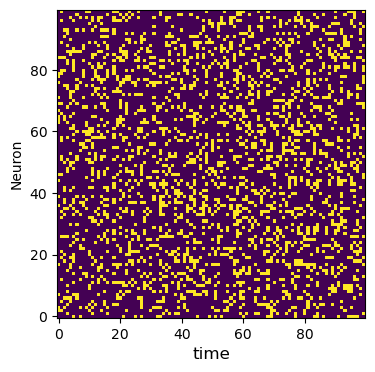

In [3]:
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.imshow(final_spikes, origin = 'lower')
ax.set_xlabel('time', fontsize = 12)
ax.set_ylabel('Neuron')
plt.show()